In [6]:
import openml
import pandas as pd
import numpy as np
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import time
import psutil
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_percentage_error, roc_curve, roc_auc_score


In [3]:
dataset = openml.datasets.get_dataset(23512)

In [5]:
X, y, categorical_indicator, attribute_names = dataset.get_data(target=dataset.default_target_attribute, dataset_format='dataframe')

X

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b-tag,jet2pt,...,jet4eta,jet4phi,jet4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,0.755421,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98045,0.908091,-0.825006,-0.830871,0.736298,1.512713,0.881811,-0.363440,0.006813,1.086538,0.763227,...,-0.187013,0.716785,0.000000,1.317681,1.010795,0.985962,0.957878,1.454672,0.903937,0.786069
98046,2.512898,0.530759,-1.470626,1.641798,1.613386,0.934027,1.521958,-0.049836,0.000000,1.029891,...,0.053673,-0.386483,0.000000,0.774413,0.745263,0.997088,1.392387,0.864681,1.179783,1.086167
98047,0.903699,0.261943,-0.429149,1.892855,0.313687,0.493396,-1.494282,-1.458506,0.000000,0.575505,...,-0.283621,1.110772,3.101961,0.527038,0.607263,1.125286,0.634106,0.115543,0.425828,0.692506
98048,0.566047,-0.317568,0.062561,0.358186,-1.315823,0.691176,1.154583,-0.242759,2.173076,0.680634,...,-0.844943,-0.294922,0.000000,0.747239,1.008975,0.989497,1.203147,0.892492,1.090807,0.888965


In [7]:
y

0        1
1        1
2        0
3        1
4        0
        ..
98045    1
98046    0
98047    0
98048    0
98049    1
Name: class, Length: 98050, dtype: category
Categories (2, object): ['0' < '1']

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)

y

array([1, 1, 0, ..., 0, 0, 1])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
lgbm_model = lgb.LGBMClassifier(n_estimators=100,learning_rate=0.1,max_depth=6,random_state=42)

start_time = time.time()

lgbm_model.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print("Elapsed Time:", elapsed_time)

memory_usage = psutil.Process().memory_info().rss / 1024**2  # in megabytes
print("Memory Usage:", memory_usage, "MB")

lgbm_accuracy = lgbm_model.score(X_test, y_test)
print("Accuracy:", lgbm_accuracy)

Elapsed Time: 0.5146269798278809
Memory Usage: 183.87890625 MB
Accuracy: 0.7212136664966854


In [15]:
catboost_model = cb.CatBoostClassifier(n_estimators=100,learning_rate=0.1,max_depth=6,random_state=42,verbose=False)

start_time = time.time()

catboost_model.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print("Elapsed Time:", elapsed_time)

memory_usage = psutil.Process().memory_info().rss / 1024**2  # in megabytes
print("Memory Usage:", memory_usage, "MB")

catboost_accuracy = catboost_model.score(X_test, y_test)
print("CatBoost Accuracy:", catboost_accuracy)


Elapsed Time: 2.0593421459198
Memory Usage: 178.1328125 MB
CatBoost Accuracy: 0.7148393676695564


In [16]:
xgboost_model = xgb.XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=6,random_state=42)

start_time = time.time()

xgboost_model.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print("Elapsed Time:", elapsed_time)

memory_usage = psutil.Process().memory_info().rss / 1024**2  # in megabytes
print("Memory Usage:", memory_usage, "MB")

xgboost_accuracy = xgboost_model.score(X_test, y_test)
print("XGBoost Accuracy:", xgboost_accuracy)

Elapsed Time: 9.96032428741455
Memory Usage: 184.17578125 MB
XGBoost Accuracy: 0.7203977562468129



Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      9232
           1       0.74      0.74      0.74     10378

    accuracy                           0.72     19610
   macro avg       0.72      0.72      0.72     19610
weighted avg       0.72      0.72      0.72     19610



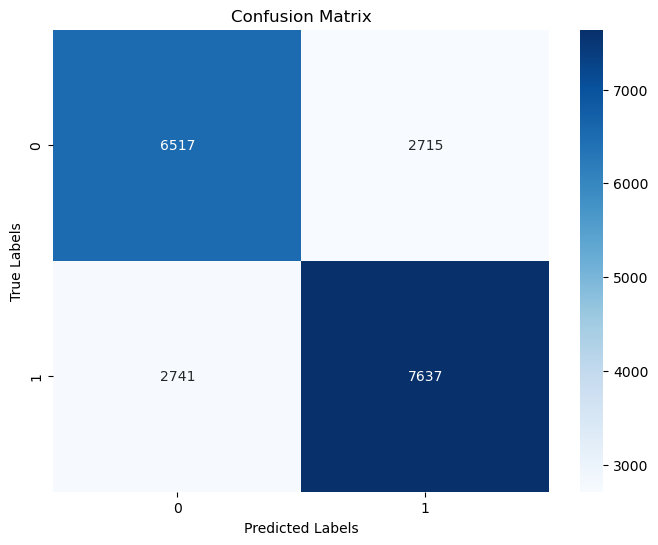

In [13]:
y_pred_lgbm = lgbm_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm))

class_labels = np.unique(np.concatenate((y_test, y_pred_lgbm)))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()